In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [4]:
pretrained_df = pd.read_csv("data/pretrained_island_effects.csv")
pretrained_df.head()

,item,model,construction,condition,gap,gram,ungram,wh_effect
0,0,grnn,Wh-Movement,Simple,+gap,I know who the family from the big city saw la...,I know that the family from the big city saw l...,-1.910231
1,0,grnn,Wh-Movement,Simple,-gap,I know that the family from the big city saw t...,I know who the family from the big city saw th...,0.583257
2,1,grnn,Wh-Movement,Simple,+gap,I remember what the woman with the blue hat bo...,I remember that the woman with the blue hat bo...,-3.269071
3,1,grnn,Wh-Movement,Simple,-gap,I remember that the woman with the blue hat bo...,I remember what the woman with the blue hat bo...,6.700210
4,2,grnn,Wh-Movement,Simple,+gap,The newspaper reported who the man from far aw...,The newspaper reported that the man from far a...,-0.152476


In [5]:
augmented_df = pd.read_csv("data/augmented_island_effects.csv")
augmented_df.head()

,item,model,construction,condition,gap,gram,ungram,wh_effect
0,0,cleft,Wh-Movement,Simple,+gap,I know who the family from the big city saw la...,I know that the family from the big city saw l...,-3.157723
1,0,cleft,Wh-Movement,Simple,-gap,I know that the family from the big city saw t...,I know who the family from the big city saw th...,3.212996
2,1,cleft,Wh-Movement,Simple,+gap,I remember what the woman with the blue hat bo...,I remember that the woman with the blue hat bo...,-1.855624
3,1,cleft,Wh-Movement,Simple,-gap,I remember that the woman with the blue hat bo...,I remember what the woman with the blue hat bo...,4.361690
4,2,cleft,Wh-Movement,Simple,+gap,The newspaper reported who the man from far aw...,The newspaper reported that the man from far a...,-0.475909


In [6]:
combined_effects = pd.concat([pretrained_df, augmented_df])

# Cleft-RNN

In [12]:
cleft_data = combined_effects[combined_effects['model'].isin(['grnn', 'cleft'])]
cleft_data['model'] = cleft_data['model'].apply(lambda model: "Pretrained" if model == "grnn" else "Cleft-RNN")

/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_8557/3767357994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleft_data['model'] = cleft_data['model'].apply(lambda model: "Pretrained" if model == "grnn" else "Cleft-RNN")


In [13]:
cleft_data.columns
simple_cleft_data = cleft_data[cleft_data['condition'] == 'Simple']

In [14]:
cleft_data.condition.unique()

array(['Simple', 'Island'], dtype=object)

## Filler-Gap Effects before and after training

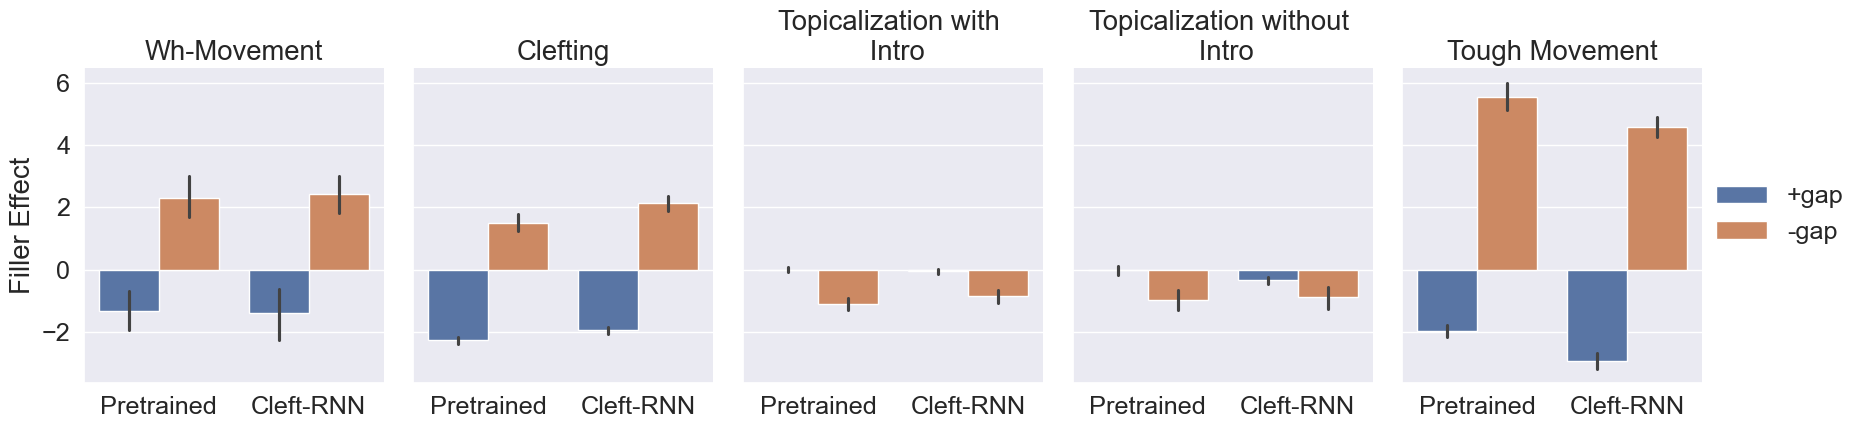

In [66]:
sns.set(font_scale=1.65)
g = sns.catplot(x="model", y="wh_effect", hue="gap", data=simple_cleft_data, kind="bar", col = "construction",
            estimator="mean", aspect = 0.7)
g.set_axis_labels("", "Filler Effect")
g.set_xticklabels(["Pretrained" , "Cleft-RNN"])
g.set_titles(template="{col_name}")
g.legend.set_title("")

In [77]:
def plot_construction_islands(data, construction_name, shift = 1):
    construction_results = data[data['construction'] == construction_name]
    g = sns.catplot(data = construction_results, x = "condition", y = "wh_effect",
                    hue = "gap", kind = "bar", col = "model")
    g.set_axis_labels("", "Filler Effect")
    g.set_xticklabels(["Simple" , "Island"])
    g.set_titles(template="{col_name}")
    g.legend.set_title("")
    plt.suptitle(construction_name, fontsize = 22, y = shift)

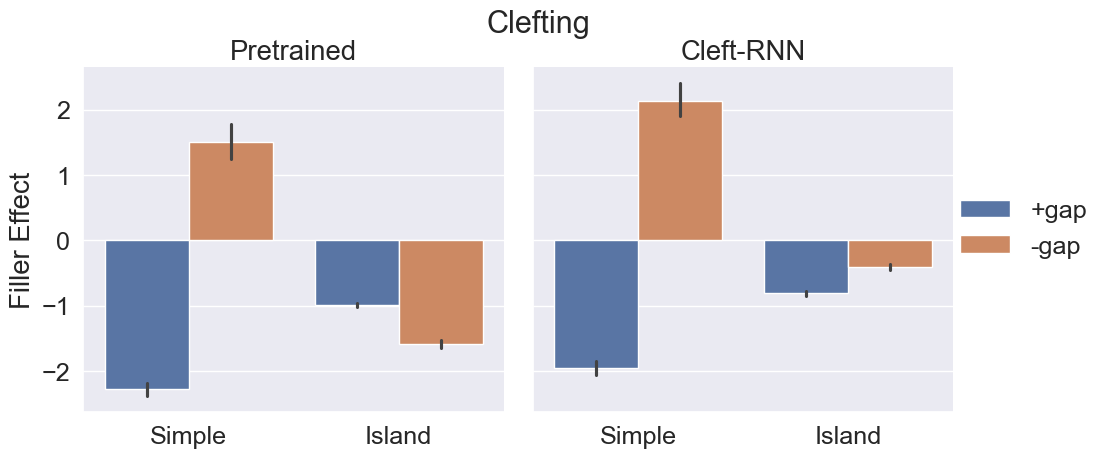

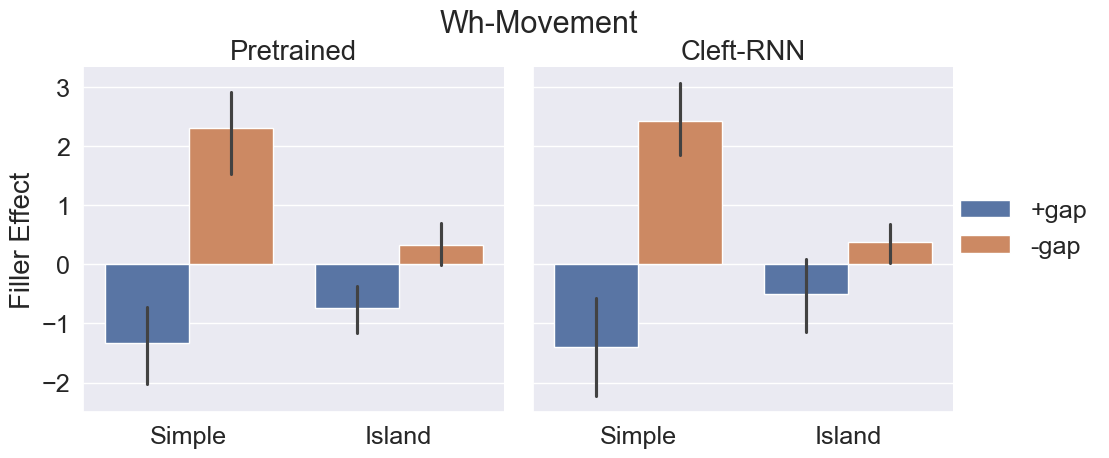

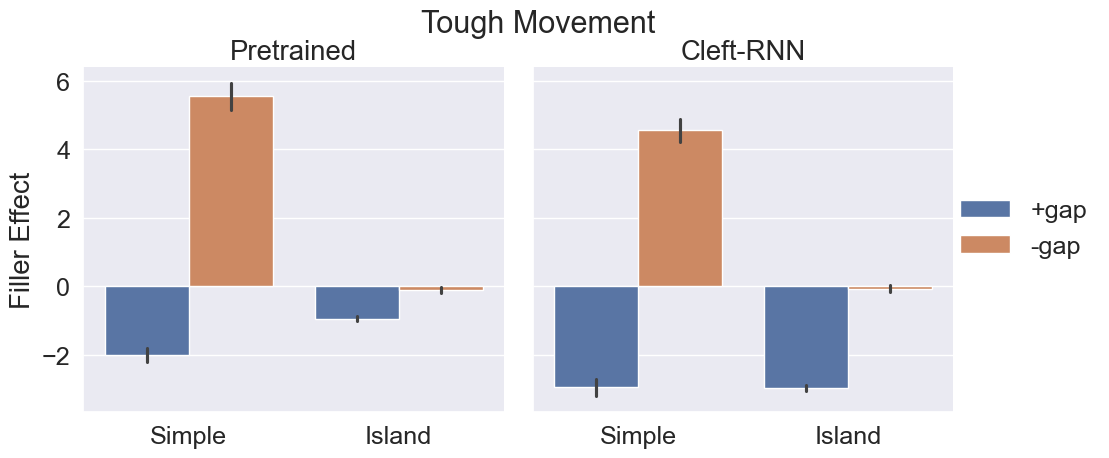

In [78]:
for construction in ["Clefting", "Wh-Movement", "Tough Movement"]:
    plot_construction_islands(cleft_data, construction)

## Topic RNN

/var/folders/23/7hcv_qtd60j5mx97z8mfdjgh0000gn/T/ipykernel_8557/536196607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_data['model'] = topic_data['model'].apply(lambda model: "Pretrained" if model == "grnn" else "Topic-RNN")


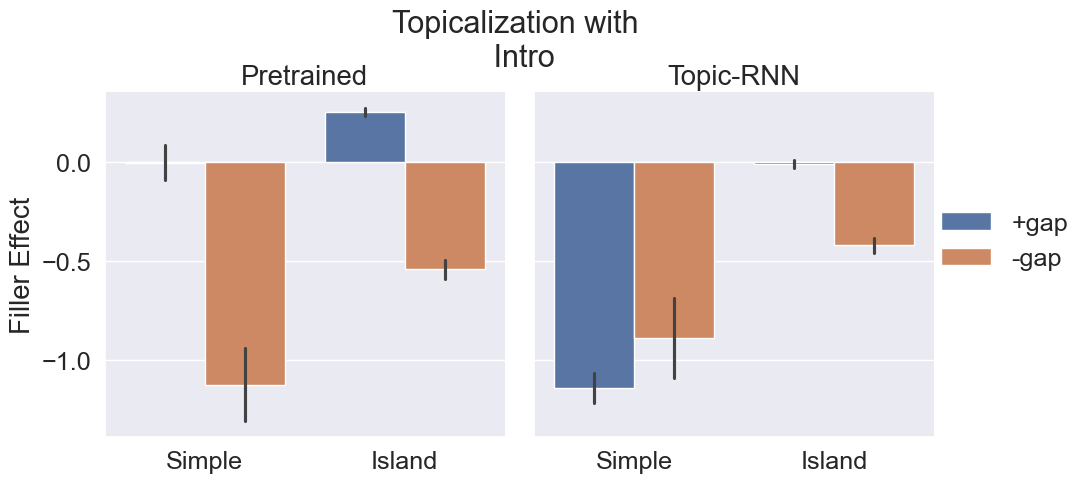

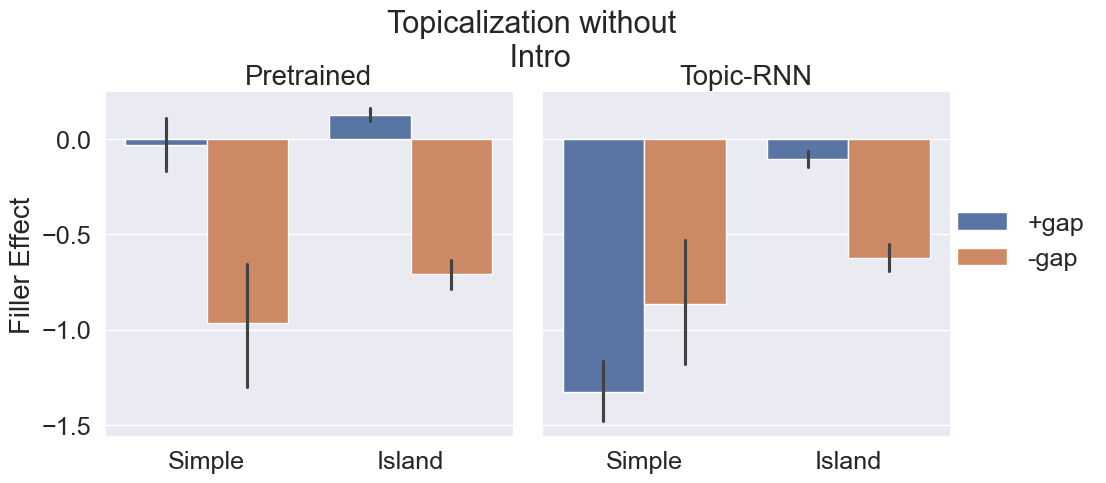

In [76]:
topic_data = combined_effects[combined_effects['model'].isin(['grnn', 'intro_topic'])]
topic_data['model'] = topic_data['model'].apply(lambda model: "Pretrained" if model == "grnn" else "Topic-RNN")
plot_construction_islands(topic_data, "Topicalization with \n Intro", shift = 1.05)
plot_construction_islands(topic_data, "Topicalization without \n Intro", shift = 1.05)

In [ ]:
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=topic_data, kind="bar", col = "construction", row = "model",
            estimator="mean", aspect = 0.7)
g.set_axis_labels("", "Filler Effect", fontsize = 24)
g.set_xticklabels(["Simple" , "Island"], size = 24)

g.set_titles(template="{col_name} ({row_name})", size = 20)
g.fig.subplots_adjust(hspace=0.25, wspace=0.25)
constructions = ['Wh-Movement', 'Clefting', 'Topicalization with Intro',
       'Topicalization without Intro', 'Tough Movement']

g.legend.set_title("")

## Comparing Differences in Surprisal

In [12]:
pretrained_df

,model,construction,condition,gap,gram,ungram,wh_effect
0,grnn,Wh-Movement,Simple,+gap,I know who the family from the big city saw la...,I know that the family from the big city saw l...,-1.910231
1,grnn,Wh-Movement,Simple,-gap,I know that the family from the big city saw t...,I know who the family from the big city saw th...,0.583257
2,grnn,Wh-Movement,Simple,+gap,I remember what the woman with the blue hat bo...,I remember that the woman with the blue hat bo...,-3.269071
3,grnn,Wh-Movement,Simple,-gap,I remember that the woman with the blue hat bo...,I remember what the woman with the blue hat bo...,6.700210
4,grnn,Wh-Movement,Simple,+gap,The newspaper reported who the man from far aw...,The newspaper reported that the man from far a...,-0.152476
...,...,...,...,...,...,...,...
27647,grnn,Tough Movement,Island,-gap,it is difficult to lose the house that contain...,her book is difficult to lose the house that c...,1.374783
27648,grnn,Tough Movement,Island,+gap,her book is difficult to lose the house that c...,it is difficult to lose the house that contain...,0.665067
27649,grnn,Tough Movement,Island,-gap,it is difficult to lose the house that contain...,her book is difficult to lose the house that c...,1.374783
27650,grnn,Tough Movement,Island,+gap,her book is difficult to lose the house that c...,it is difficult to lose the house that contain...,-1.218410


In [39]:
cleft_rnn = augmented_df[augmented_df['model'] == 'cleft']
topic_rnn = augmented_df[augmented_df['model'] == 'intro_topic']

pretrained_df['cleft_diff'] = cleft_rnn['wh_effect'] - pretrained_df['wh_effect']
pretrained_df['topic_diff'] = topic_rnn['wh_effect'].values - pretrained_df['wh_effect'].values

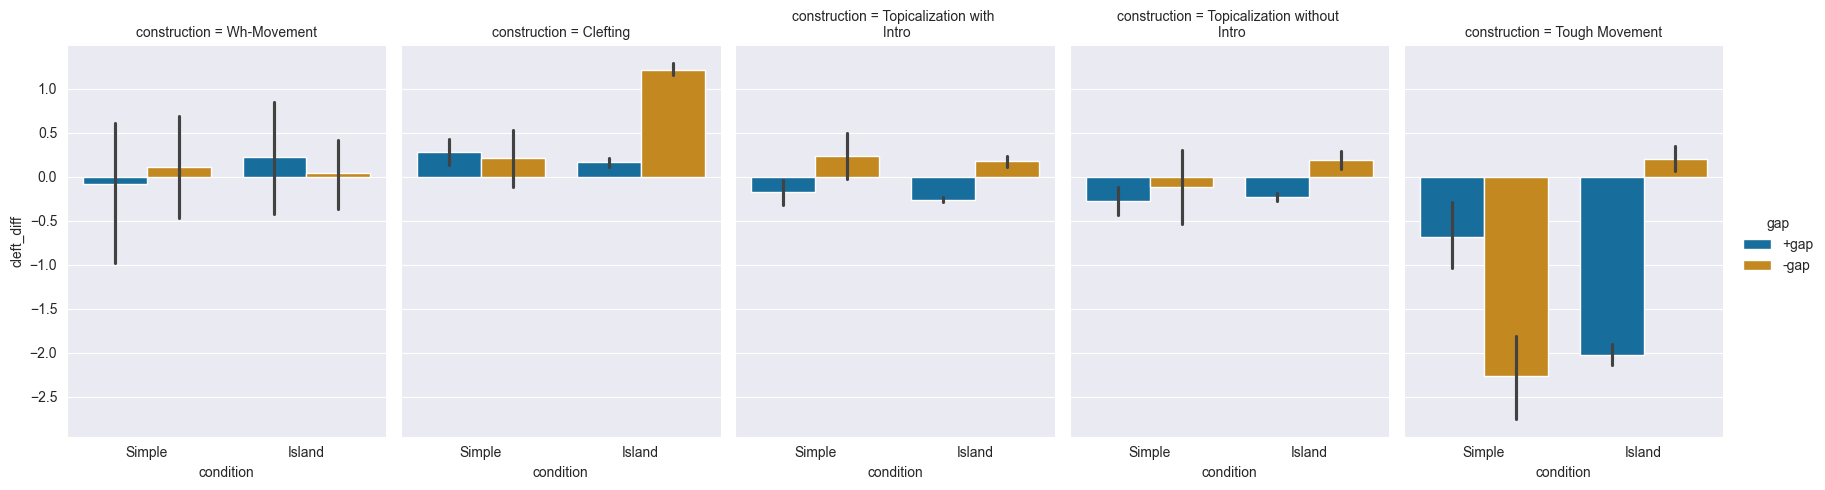

In [40]:
g = sns.catplot(x="condition", y="cleft_diff", hue = "gap", data=pretrained_df, kind="bar", col = "construction",
            estimator="mean", aspect = 0.7)


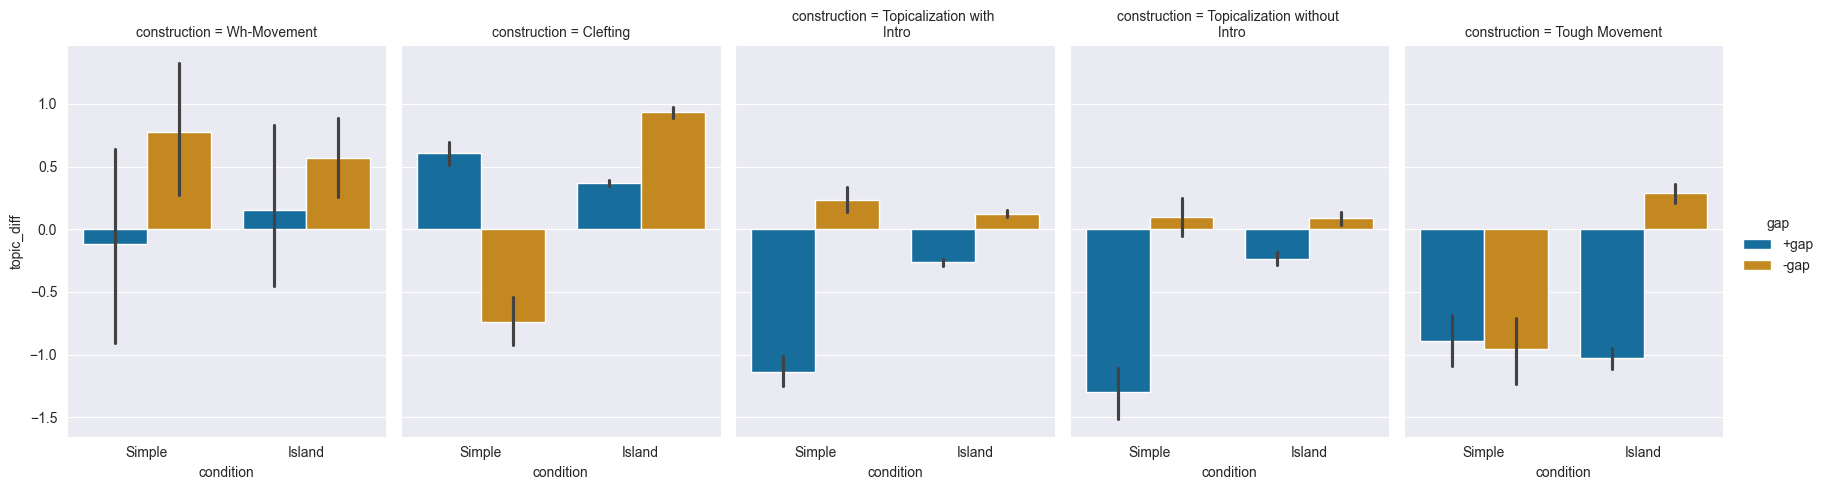

In [41]:
g = sns.catplot(x="condition", y="topic_diff", hue = "gap", data=pretrained_df, kind="bar", col = "construction",
            estimator="mean", aspect = 0.7)
